# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [143]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [144]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [145]:
adultDataSet_filename = os.path.join(os.getcwd(), "data", "adultData.csv")
df =pd.read_csv(adultDataSet_filename)

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [146]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [147]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32399.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32236.000000
mean,38.589216,1.897784e+05,10.080679,615.907773,87.303830,40.450428
std,13.647862,1.055500e+05,2.572720,2420.191974,402.960219,12.353748
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,14084.000000,4356.000000,99.000000


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32399 non-null  float64
 1   workclass       30725 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   32561 non-null  int64  
 5   marital-status  32561 non-null  object 
 6   occupation      30718 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex_selfID      32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32236 non-null  float64
 13  native-country  31978 non-null  object 
 14  income_binary   32561 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 3.7+ MB


In [149]:
df.isnull().sum()

age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
dtype: int64

In [150]:
tot_records=df.shape[0]
tot_features= df.shape[1]
below_50k= df[df['income_binary']== '<=50K'].shape[0]
over_50k= df[df['income_binary']== '>50K'].shape[0]
percent_above =  (over_50k /tot_records) * 100

print("Individuals making more than $50K: {}".format(over_50k))
print("Individuals making less than $50K: {}".format(below_50k))
print("Percentage of people making over $50k: {:.2f}%".format(percent_above))

Individuals making more than $50K: 7841
Individuals making less than $50K: 24720
Percentage of people making over $50k: 24.08%


In [151]:
df.drop('education', inplace=True, axis=1)
df.columns.tolist()

['age',
 'workclass',
 'fnlwgt',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex_selfID',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income_binary']

In [152]:
df.isna().sum()

age                162
workclass         1836
fnlwgt               0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
dtype: int64

In [153]:
df.duplicated().sum()

22

In [154]:
df = df[~df.duplicated()]
df.duplicated().sum()

0

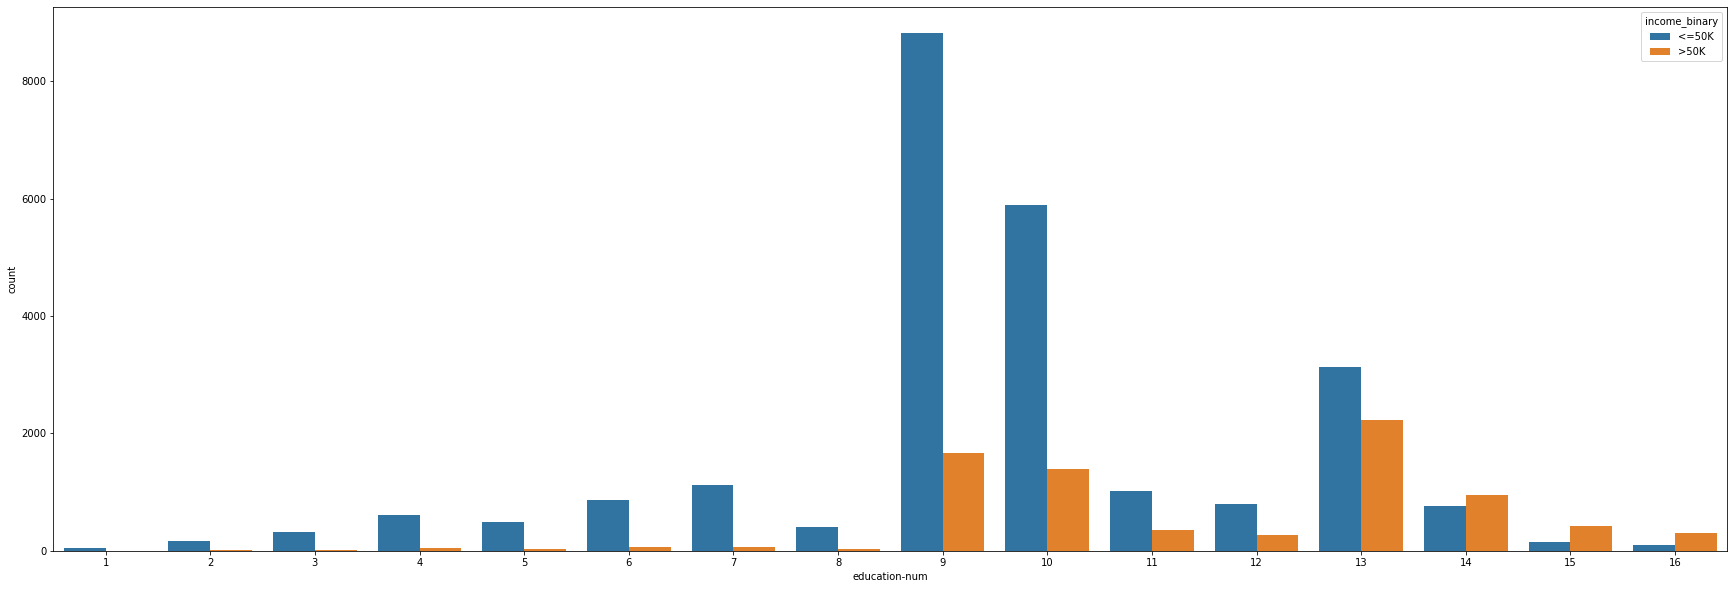

In [155]:
plt.subplots(figsize=(30,10))
sns.countplot(x='education-num', hue='income_binary',  data=df)
plt.show()

In [76]:
#Individuals are more likely to make above 50K if they have more of an education

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [156]:
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

age                162
workclass         1836
fnlwgt               0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
dtype: int64

In [157]:
condition = nan_count != 0 # look for all columns with missing values

col_names = nan_count[condition].index # get the column names
print(col_names)

nan_cols = list(col_names) # convert column names to list
print(nan_cols)

Index(['age', 'workclass', 'occupation', 'hours-per-week', 'native-country'], dtype='object')
['age', 'workclass', 'occupation', 'hours-per-week', 'native-country']


In [158]:
nan_col_types = df[nan_cols].dtypes
nan_col_types

age               float64
workclass          object
occupation         object
hours-per-week    float64
native-country     object
dtype: object

In [160]:
print(df['age'].unique())
print(df['hours-per-week'].unique())


[39. 50. 38. 53. 28. 37. 49. 52. 31. 42. 30. 23. 32. 40. 34. 25. 43. 54.
 35. 59. 56. 19. 20. 45. 22. 48. 21. 24. 57. 44. 41. 29. nan 18. 47. 46.
 36. 79. 27. 67. 33. 76. 17. 55. 61. 70. 64. 71. 68. 66. 51. 58. 26. 60.
 90. 75. 65. 77. 62. 63. 80. 72. 74. 69. 73. 81. 78. 88. 82. 83. 84. 85.
 86. 87.]
[40. 13. 16. 45. 50. 80. 30. 35. nan 60. 20. 52. 44. 15. 25. 38. 43. 55.
 48. 58. 32. 70.  2. 22. 56. 28. 36. 24. 46. 42. 12. 65.  1. 10. 34. 75.
 98. 33. 54.  8.  6. 64. 19. 18. 72.  5.  9. 47. 37. 21. 26. 14.  4. 59.
  7. 99. 53. 39. 62. 41. 57. 78. 90. 66. 11. 49. 84.  3. 17. 68. 27. 85.
 31. 51. 77. 63. 23. 87. 88. 73. 89. 97. 94. 29. 96. 67. 82. 86. 91. 81.
 76. 92. 61. 74. 95.]


In [161]:
df['age_na'] = df['age'].isnull()
df['hours-per-week_na'] = df['hours-per-week'].isnull()
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary,age_na,hours-per-week_na
0,39.0,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K,False,False
1,50.0,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K,False,False
2,38.0,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K,False,False
3,53.0,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K,False,False
4,28.0,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K,False,False


In [162]:
df.loc[df['age'].isnull()]

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary,age_na,hours-per-week_na
50,NaN,Private,32275,10,Married-civ-spouse,Exec-managerial,Wife,Other,Female,0,0,40.0,United-States,<=50K,True,False
298,NaN,Private,278130,9,Never-married,Craft-repair,Own-child,White,Non-Female,0,0,40.0,United-States,<=50K,True,False
433,NaN,Private,29662,12,Married-civ-spouse,Other-service,Wife,White,Female,0,0,25.0,United-States,>50K,True,False
524,NaN,Private,177905,10,Divorced,Machine-op-inspct,Unmarried,White,Non-Female,0,0,58.0,United-States,>50K,True,False
852,NaN,Self-emp-not-inc,177407,9,Married-civ-spouse,Sales,Husband,White,Non-Female,0,0,50.0,United-States,<=50K,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31501,NaN,Private,259301,9,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40.0,United-States,<=50K,True,False
31617,NaN,Self-emp-not-inc,119793,9,Never-married,Other-service,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K,True,False
31636,NaN,Private,58484,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40.0,United-States,<=50K,True,False
31913,NaN,NaN,90230,9,Never-married,NaN,Own-child,White,Non-Female,0,0,20.0,United-States,<=50K,True,False


In [163]:
print("Row 298:  " + str(df['age'][298]))

# compute mean for all non null age values
mean_ages=df['age'].mean()
print("mean value for all age columns: " + str(mean_ages))

# fill all missing values with the mean
df['age'].fillna(value=mean_ages, inplace=True)

# look at one of the rows that contained a missing value for age. 
# It should now contain the mean
print("Row 298:  " + str(df['age'][298]))

Row 298:  nan
mean value for all age columns: 38.59233406430491
Row 298:  38.59233406430491


In [164]:
mean_hours = df['hours-per-week'].mean()
print("Mean value for hours-per-week column" + str(mean_hours))
df['hours-per-week'].fillna(value= mean_hours, inplace = True)
print("Row 298" + str(df['hours-per-week'][298]))

Mean value for hours-per-week column40.45238095238095
Row 29840.0


In [165]:
np.sum(df['age'].isnull(), axis = 0)

0

In [168]:
np.sum(df['hours-per-week'].isnull(), axis=0)

0

In [169]:
df = df.replace('?', np.nan)

In [170]:
round((df.isnull().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

age                   0.0 %
workclass            5.64 %
fnlwgt                0.0 %
education-num         0.0 %
marital-status        0.0 %
occupation           5.66 %
relationship          0.0 %
race                  0.0 %
sex_selfID            0.0 %
capital-gain          0.0 %
capital-loss          0.0 %
hours-per-week        0.0 %
native-country       1.79 %
income_binary         0.0 %
age_na                0.0 %
hours-per-week_na     0.0 %
dtype: object

In [172]:
columns_with_nan = ['workclass', 'occupation', 'native-country']
for col in columns_with_nan:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [173]:
from sklearn.preprocessing import LabelEncoder

In [174]:
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [175]:
X= df.drop('income_binary', axis=1)
y= df['income_binary']
from sklearn.ensemble import ExtraTreesClassifier
selects = ExtraTreesClassifier(random_state=42)

In [176]:
selects.fit(X, y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

In [182]:
imp_features= selects.feature_importances_
for index, val in enumerate(imp_features):
    print(index, round((val * 100), 2))

0 15.34
1 4.01
2 16.41
3 12.43
4 7.51
5 7.23
6 7.94
7 1.32
8 2.69
9 11.06
10 3.0
11 9.26
12 1.46
13 0.12
14 0.21


In [183]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32539 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                32539 non-null  float64
 1   workclass          32539 non-null  int64  
 2   fnlwgt             32539 non-null  int64  
 3   education-num      32539 non-null  int64  
 4   marital-status     32539 non-null  int64  
 5   occupation         32539 non-null  int64  
 6   relationship       32539 non-null  int64  
 7   race               32539 non-null  int64  
 8   sex_selfID         32539 non-null  int64  
 9   capital-gain       32539 non-null  int64  
 10  capital-loss       32539 non-null  int64  
 11  hours-per-week     32539 non-null  float64
 12  native-country     32539 non-null  int64  
 13  age_na             32539 non-null  bool   
 14  hours-per-week_na  32539 non-null  bool   
dtypes: bool(2), float64(2), int64(11)
memory usage: 4.8 MB


In [187]:
X = X.drop(['workclass', 'education-num', 'race', 'sex_selfID',
            'capital-loss', 'native-country'], axis=1)

In [188]:
from sklearn.preprocessing import StandardScaler
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

In [189]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [190]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (26031, 9)
X_test shape: (6508, 9)
y_train shape: (26031,)
y_test shape: (6508,)


In [216]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer= TfidfVectorizer()
tfidf_vectorizer.fit(X_train)
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf= tfidf_vectorizer.transform(X_test)

In [217]:
print(X_test_tfidf)

  (0, 0)	1.0
  (1, 3)	1.0
  (2, 10)	0.7071067811865476
  (2, 6)	0.7071067811865476
  (3, 7)	1.0
  (4, 9)	1.0
  (5, 4)	0.7071067811865476
  (5, 2)	0.7071067811865476
  (6, 11)	0.641929438143728
  (6, 8)	0.5421838232760536
  (6, 5)	0.5421838232760536
  (7, 1)	1.0
  (8, 12)	0.641929438143728
  (8, 8)	0.5421838232760536
  (8, 5)	0.5421838232760536


In [194]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [195]:
y_pred_log_reg = log_reg.predict(X_test)

In [196]:
from sklearn.neighbors import KNeighborsClassifier

In [197]:
model= KNeighborsClassifier()
model.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [199]:
Y_pred_knn = model.predict(X_test)

In [200]:
from sklearn.tree import DecisionTreeClassifier

In [203]:
decc_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [204]:
Y_pred_dec_tree = dec_tree.predict(X_test)

In [205]:
from sklearn.ensemble import RandomForestClassifier

In [206]:
random_for = RandomForestClassifier(random_state=42)
random_for.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [208]:
Y_pred_ran_for = random_for.predict(X_test)

In [209]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [211]:
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_log_reg) * 100, 2))

Logistic Regression:
Accuracy score: 79.0


In [212]:
print('KNN Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_knn) * 100, 2))

KNN Classifier:
Accuracy score: 81.61


In [213]:
print('Decision Tree Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_dec_tree) * 100, 2))

Decision Tree Classifier:
Accuracy score: 78.92


In [214]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_ran_for) * 100, 2))

Random Forest Classifier:
Accuracy score: 83.08


In [221]:
from sklearn.model_selection import RandomizedSearchCV

In [229]:
n_estimators = [int(x) for x in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]
param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth, }


In [230]:
rando_tuned = RandomForestClassifier(random_state=42)
rando_cv = RandomizedSearchCV(
    estimator=rando_tuned, param_distributions=param_dist, cv=5, random_state=42)
rando_cv.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [232]:
rando_cv.best_score_

0.8298569606312494

In [233]:
rando_cv.best_params_


{'max_depth': 110, 'n_estimators': 142}

In [234]:
rando_best = RandomForestClassifier(
    max_depth=102, n_estimators=40, random_state=42)
rando_best.fit(X_train, Y_train)
Y_pred_rf_best = rando_best.predict(X_test)
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_rf_best) * 100, 2))

Random Forest Classifier:
Accuracy score: 82.85
